In [1]:
import json
from matplotlib import pyplot as plt 
import matplotlib as mpl
import numpy as np
import re
import csv


data_root_path = "/home/asingal/home/SeQUeNCe/sequence_projects/swap_files/final_data"

In [2]:
# Default MPL styles:
plt.rcParams['figure.facecolor'] = '#dcdcdc'
plt.rcParams['axes.facecolor'] = '#f8f8f8'
plt.rcParams['axes.grid'] = 'True'

plt.rcParams["axes.formatter.useoffset"] = False  # Disable offset notation
plt.rcParams["axes.formatter.use_mathtext"] = True  # Use math text for scientific notation
plt.rcParams["axes.formatter.limits"] = (-2, 2)  # Force scientific notation for numbers outside [10⁻², 10²]

plt.rcParams["xtick.labelsize"] = 11  # Major tick size for x-axis
plt.rcParams["ytick.labelsize"] = 11  # Major tick size for y-axis

plt.rcParams["figure.figsize"] = (6,5)

plt.tight_layout()

# plt.rcParams["xtick.minor.size"] = 12   # Minor tick size for x-axis
# plt.rcParams["ytick.minor.size"] = 12   # Minor tick size for y-axis

<Figure size 600x500 with 0 Axes>

## MPN vs Time for TN

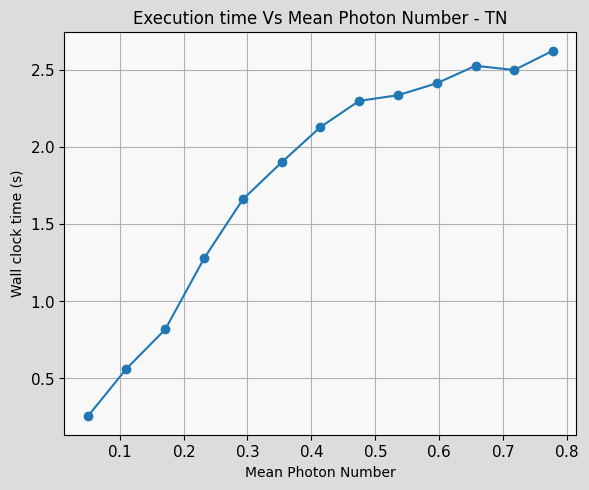

In [3]:
data_file = open(data_root_path+"/mpnVsTime.json", 'r')
data = json.load(data_file)

mean_photon_nums = data["mpn"]
times = data["time"]

fig = plt.figure()
plt.title("Execution time Vs Mean Photon Number - TN")
plt.xlabel("Mean Photon Number")
plt.ylabel("Wall clock time (s)")
plt.plot(mean_photon_nums, times, marker='o')

plt.grid(True)
plt.yscale('linear')

plt.tight_layout()
fig.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/mpnVsTime.pdf", format = 'pdf')

## Sparse Time Vs MPN

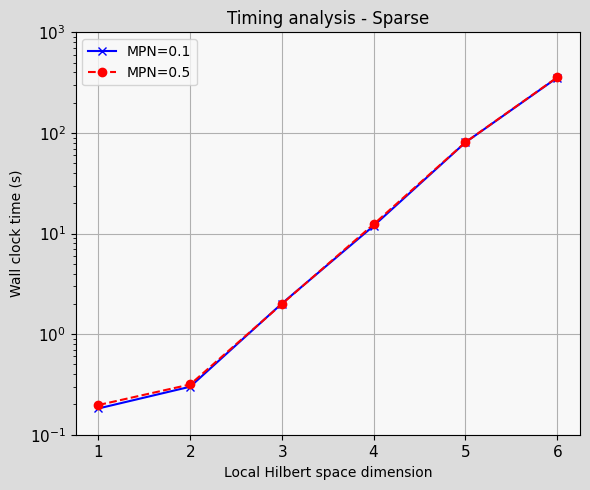

In [4]:
data10_file = open(data_root_path+"/sparse_timing_data_mpn10.json", 'r')
data10 = data10_file.readline()

data10 = (list(map(float, re.findall(r"([0-9]+.[0-9]+)", data10))))

# print(type(data10))

data50_file = open(data_root_path+"/sparse_timing_data_mpn50.json", 'r')
data50 = data50_file.readline()

data50 = (list(map(float, re.findall(r"([0-9]+.[0-9]+)", data50))))

truncations = [1,2,3,4,5,6]

fig = plt.figure()
plt.title("Timing analysis - Sparse")
# plt.ylim(10**-1,10**2.5)
plt.xlabel("Local Hilbert space dimension")
plt.ylabel("Wall clock time (s)")
plt.plot(truncations, data10, marker='x', color="b", label = "MPN=0.1")
plt.plot(truncations, data50, linestyle='dashed', marker='o', color = "r", label = "MPN=0.5")

plt.ylim(10**-1,10**3)
plt.legend()
plt.yscale('log')

plt.tight_layout()
fig.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/sparse_timing_data_mpn10.pdf", format = 'pdf')

## Memory analysis

[592873.0, 834233.0, 1806583.0, 4758243.0, 11034310.0, 22902888.0] 1e-05
[567141.0, 785154.0, 2795511.0, 6357656.0, 14736415.0, 30724125.0] 1e-06
[564030.0, 1345012.0, 3949935.0, 10716348.0, 25023754.0, 51971301.0] 1e-07
[563158.0, 1374396.0, 6730150.0, 16173330.0, 32887361.0, 79429365.0] 1e-08
[563499.0, 1676705.0, 11966149.0, 20558461.0, 48003698.0, 99522574.0] 1e-09
[563130.0, 1690327.0, 12221687.0, 43453364.0, 62028149.0, 128644093.0] 1e-10
[562652.0, 1686587.0, 16418714.0, 95729633.0, 341635964.0, 858208988.0] 1e-05
[563003.0, 1686410.0, 18474634.0, 119638769.0, 477689681.0, 1448287001.0] 1e-06
[562425.0, 1686532.0, 18467774.0, 129671137.0, 564639434.0, 1896128961.0] 1e-07
[562337.0, 1686301.0, 18467595.0, 129969564.0, 616116775.0, 2235076943.0] 1e-08
[563073.0, 1686118.0, 18467656.0, 129966638.0, 649197893.0, 2443017860.0] 1e-09
[563612.0, 1686641.0, 18467891.0, 129966639.0, 650069139.0, 2545034449.0] 1e-10


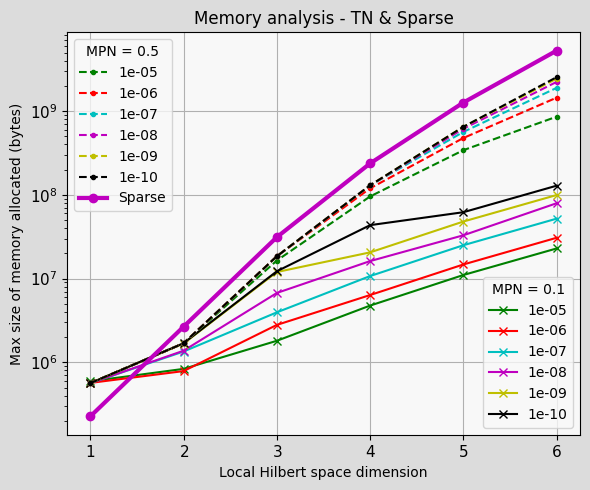

In [5]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
truncations = [1,2,3,4,5,6]

fig = plt.figure()
plt.title("Memory analysis - TN & Sparse")
# plt.ylim(10**-1,10**2.5)
plt.xlabel("Local Hilbert space dimension")
plt.ylabel("Max size of memory allocated (bytes)")

# TN: 0.1
data_file = open(data_root_path+"/memory_data_mpn10.json", 'r')
data = json.load(data_file)

for (key,value), color in zip(list(data.items()), colors):
    if not key == "0.0001":
        plt.plot(truncations, value, label=f"{key}", color = color, marker='x')
        print(value, key)
first_legend = plt.legend(loc = 4, title = "MPN = 0.1")
plt.gca().add_artist(first_legend)
# plt.yscale('log')

# TN: 0.5
data_file = open(data_root_path+"/memory_data_mpn50.json", 'r')
data = json.load(data_file)

plots_50 = []
for (key,value), color in zip(list(data.items()), colors):
    if not key == "0.0001":
        plots_50.append(plt.plot(truncations, value, label=f"{key}", color = color, linestyle='dashed', marker='.')[0])
        print(value, key)
# plt.legend()
# plt.yscale('log')

# Sparse:
data_file = open(data_root_path+"/sparse_memory_data_mpn50.json", 'r')
data = json.load(data_file)
# print(type(data))

# data = (list(map(float, re.findall(r"([0-9]+.[0-9]+)", data))))
plots_50.append(plt.plot(truncations, data, marker='o', linewidth = 3,  color="m", label = "Sparse")[0])


plt.legend(handles = plots_50, loc = 2, title = "MPN = 0.5")

# for (key,value), color in zip(list(data.items()), colors):
#     plt.plot(truncations, value, label=f"{key}, MPN=0.5", color = color, linestyle='dashed', marker='o')
#     print(value, key)
# plt.legend(loc = 4)
plt.yscale('log')

plt.tight_layout()
fig.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/memory_analysis.pdf", format = 'pdf')

## Timing Analysis

[0.22347840070724487, 0.2263180732727051, 0.2772811412811279, 0.5171411395072937, 0.8763993382453918, 0.98942950963974] 1e-05
[0.2008926272392273, 0.2229377269744873, 0.31451876163482667, 0.6744531035423279, 0.9288583993911743, 1.2111708998680115] 1e-06
[0.20055882930755614, 0.261696994304657, 0.8776782393455506, 1.0474172949790954, 1.5541849493980409, 1.9780197143554688] 1e-07
[0.200469446182251, 0.2634535312652588, 0.8998985886573792, 1.0302767395973205, 1.9279912114143372, 2.178825521469116] 1e-08
[0.19948976039886473, 0.26426645517349245, 1.1606568694114685, 2.071381688117981, 2.7511340737342835, 3.3941158771514894] 1e-09
[0.20061453580856323, 0.2977584481239319, 1.6051735162734986, 3.036575722694397, 4.161774778366089, 6.323984599113464] 1e-10
[0.2032460927963257, 0.2888826847076416, 1.5784573554992676, 3.7737762928009033, 6.9757863759994505, 12.001848816871643] 1e-05
[0.20173485279083253, 0.2939745426177979, 1.7188662052154542, 7.154596519470215, 12.834611463546754, 24.4427257537

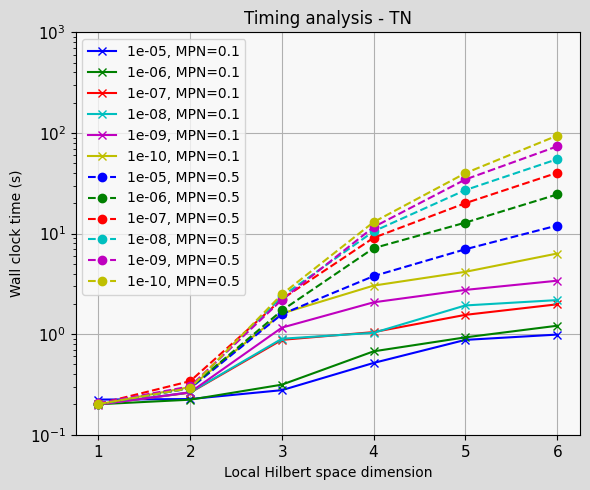

In [6]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
truncations = [1,2,3,4,5,6]

data_file = open(data_root_path+"/timing_data_mpn10.json", 'r')
data = json.load(data_file)

fig = plt.figure()
plt.title("Timing analysis - TN")
plt.ylim(10**-1,10**3)
plt.xlabel("Local Hilbert space dimension")
plt.ylabel("Wall clock time (s)")
for (key,value), color in zip(list(data.items()), colors):
    plt.plot(truncations, value, label=f"{key}, MPN=0.1", color = color, marker='x')
    print(value, key)
plt.legend()
plt.yscale('log')

data_file = open(data_root_path+"/timing_data_mpn50.json", 'r')
data = json.load(data_file)

for (key,value), color in zip(list(data.items()), colors):
    plt.plot(truncations, value, label=f"{key}, MPN=0.5", color = color, linestyle='dashed', marker='o')
    print(value, key)
plt.legend()
plt.yscale('log')

plt.tight_layout()
fig.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/timing_data_mpn10.pdf", format = 'pdf')

## Swapping fringes:

In [7]:
def plot_coincidences(coincidence, idler_angles, signal_angles, title = ''):
    visibilities = []
    for i in range(len(coincidence)):
        visibility = (max(coincidence[i]) - min(coincidence[i])) / (max(coincidence[i]) + min(coincidence[i]))
        visibilities.append(visibility)
        print(visibility, coincidence[i])

    idler_angles = np.array(list(map(float, idler_angles)))/np.pi

    fig1 = plt.figure(figsize=(7,5))
    for i in range(len(idler_angles)):
        # print(fringe_real[i])
        plt.plot(signal_angles, coincidence[i], label=r'{:.2f}$\pi$'.format(idler_angles[i]))
    plt.title(title)
    plt.ylabel("Coincidence probability")
    plt.xlabel(r"$\alpha$ (Radians)")    
    plt.legend(title = "$\delta$")

    fig2 = plt.figure(figsize=(6,5))
    plt.plot(idler_angles*np.pi, visibilities)
    plt.title("Visiblilities")
    plt.ylabel("Visibility")
    plt.xlabel(r"$\delta$")

    return fig1, fig2    

0.9823095701415749 [5.07429115867197e-06, 8.728985373732791e-06, 1.9598413358404035e-05, 3.74010626373523e-05, 6.1675853945554e-05, 9.17940829390854e-05, 0.00012697570330739676, 0.00016630952956299633, 0.0002087768362669814, 0.00025327774248275935, 0.00029865969811459966, 0.00034374733434967315, 0.0003873729050929431, 0.00042840653097761896, 0.00046578546264725045, 0.0004985416054058529, 0.0005258265923619825, 0.0005469337566856143, 0.0005613164339078628, 0.0005686021202435397, 0.0005686021202435369, 0.0005613164339078659, 0.0005469337566856179, 0.000525826592361977, 0.0004985416054058504, 0.00046578546264725566, 0.00042840653097762026, 0.0003873729050929502, 0.0003437473343496751, 0.00029865969811460036, 0.0002532777424827606, 0.0002087768362669834, 0.00016630952956299928, 0.00012697570330739695, 9.17940829390877e-05, 6.16758539455547e-05, 3.7401062637353397e-05, 1.959841335840501e-05, 8.72898537373312e-06, 5.074291158671947e-06]
0.9804889617366264 [1.2267814836764372e-05, 5.612388860

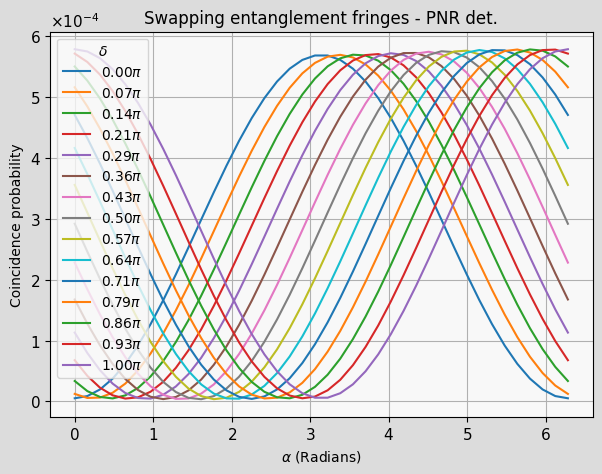

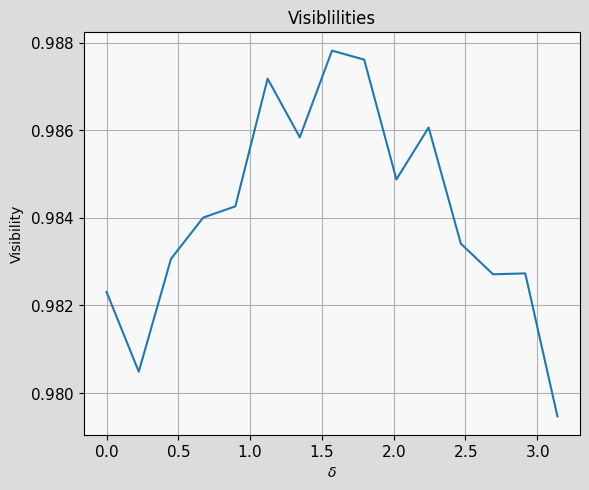

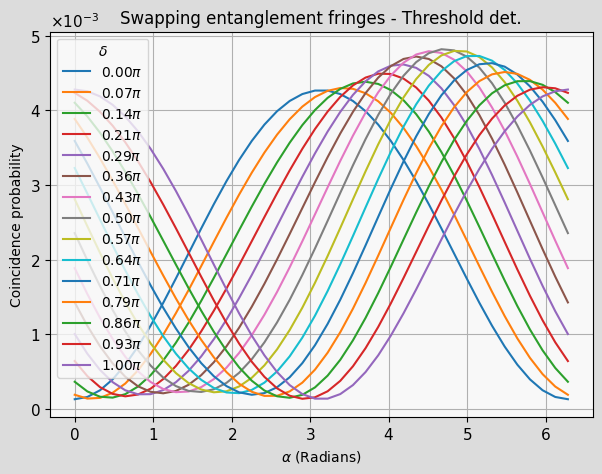

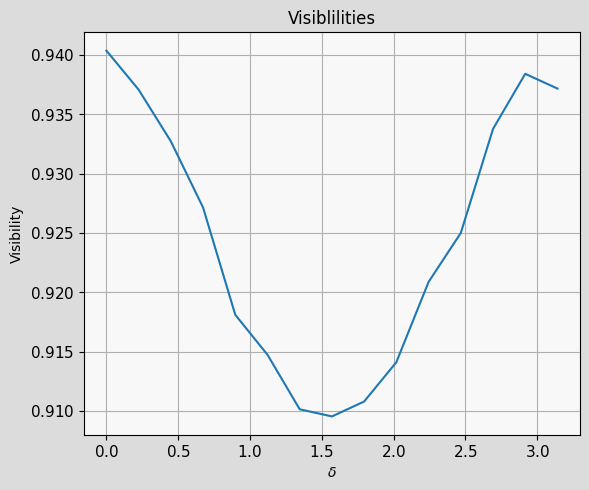

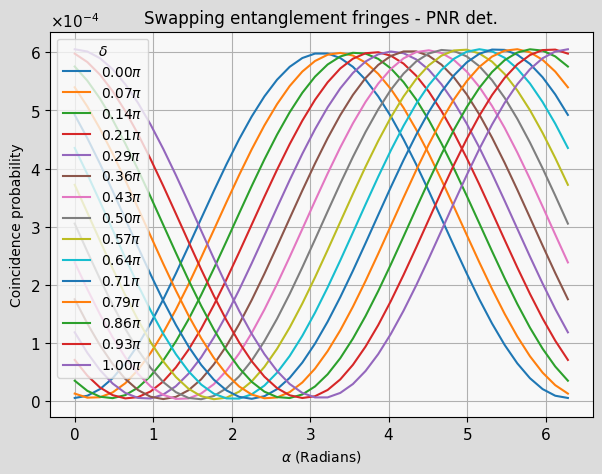

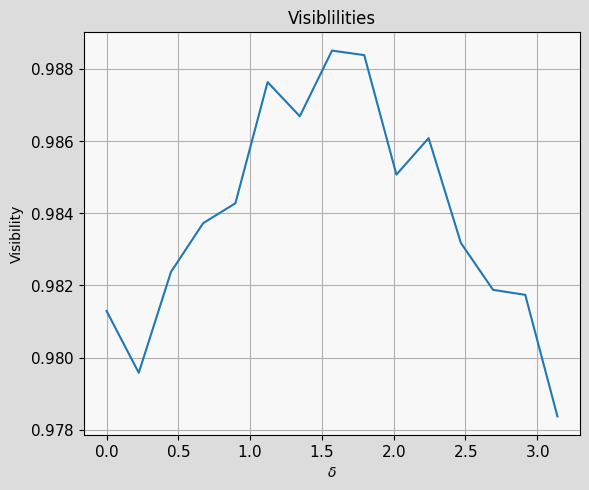

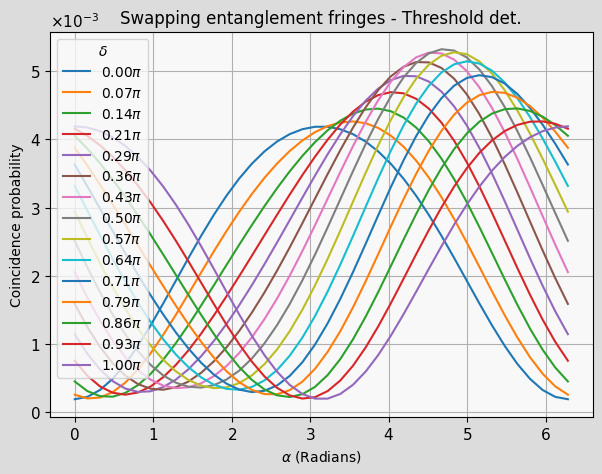

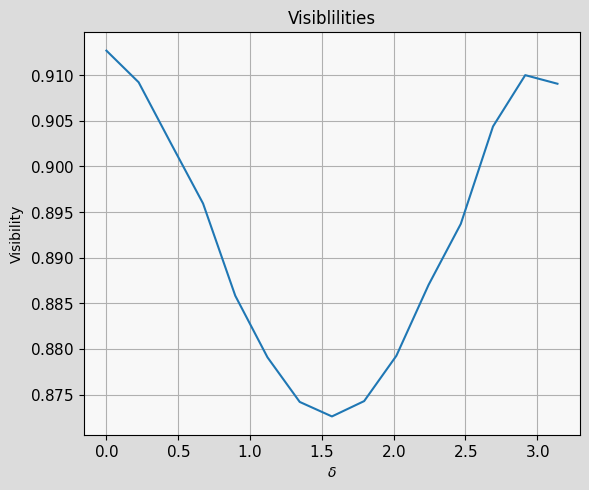

In [8]:
signal_angles = np.linspace(0, 2*np.pi, 40)

data_file = open(data_root_path+"/fringe_data/fringe_PNR_trunc2.json", 'r')
data = json.load(data_file)
fig1, fig2 = plot_coincidences(list(data.values()), list(data.keys()), signal_angles, title = "Swapping entanglement fringes - PNR det.")
plt.tight_layout()
fig1.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/fringe_PNR_trunc2.pdf", format = 'pdf')
plt.tight_layout()
fig2.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/visibility_PNR_trunc2.pdf", format = 'pdf')

data_file = open(data_root_path+"/fringe_data/fringe_threshold_trunc2.json", 'r')
data = json.load(data_file)
fig1, fig2 = plot_coincidences(list(data.values()), list(data.keys()), signal_angles, title = "Swapping entanglement fringes - Threshold det.")
plt.tight_layout()
fig1.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/fringe_threshold_trunc2.pdf", format = 'pdf')
plt.tight_layout()
fig2.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/visibility_threshold_trunc2.pdf", format = 'pdf')

data_file = open(data_root_path+"/fringe_data/fringe_PNR_trunc3.json", 'r')
data = json.load(data_file)
fig1, fig2 = plot_coincidences(list(data.values()), list(data.keys()), signal_angles, title = "Swapping entanglement fringes - PNR det.")
plt.tight_layout()
fig1.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/fringe_PNR_trunc3.pdf", format = 'pdf')
plt.tight_layout()
fig2.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/visibility_PNR_trunc3.pdf", format = 'pdf')

data_file = open(data_root_path+"/fringe_data/fringe_threshold_trunc3.json", 'r')
data = json.load(data_file)
fig1, fig2 = plot_coincidences(list(data.values()), list(data.keys()), signal_angles, title = "Swapping entanglement fringes - Threshold det.")
plt.tight_layout()
fig1.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/fringe_threshold_trunc3.pdf", format = 'pdf')
plt.tight_layout()
fig2.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/visibility_threshold_trunc3.pdf", format = 'pdf')

## Distribution fringes

In [9]:
# Processing experimental data for plotting
H_File_csv = [line for line in csv.reader(open(data_root_path+'/distribution_data/CLEO_data/C22_C46/H_idler_000.txt', mode ='r'))]
H_data = np.array(H_File_csv[1:], dtype = np.int64)
# H_coincidence_probs = H_data[:, 5]/1e9

V_File_csv = [line for line in csv.reader(open(data_root_path+'/distribution_data/CLEO_data/C22_C46/V_idler_180.txt', mode ='r'))]
V_data = np.array(V_File_csv[1:], dtype = np.int64)
# V_coincidence_probs = V_data[:, 5]/1e9

L_File_csv = [line for line in csv.reader(open(data_root_path+'/distribution_data/CLEO_data/C22_C46/L_idler_270.txt', mode ='r'))]
L_data = np.array(L_File_csv[1:], dtype = np.int64)
# L_coincidence_probs = L_data[:, 5]/1e9

R_File_csv = [line for line in csv.reader(open(data_root_path+'/distribution_data/CLEO_data/C22_C46/R_idler_090.txt', mode ='r'))]
R_data = np.array(R_File_csv[1:], dtype = np.int64)
# R_coincidence_probs = R_data[:, 5]/1e9

experimental_domain = H_data[:, 0] * np.pi/180

## Plotting data

We plot the experiemntal results vs the simulated data. We perform sinusoidal fits over both simulated and exerimental results to interpret the data easily. 

Average visibility: 0.8924440031447135


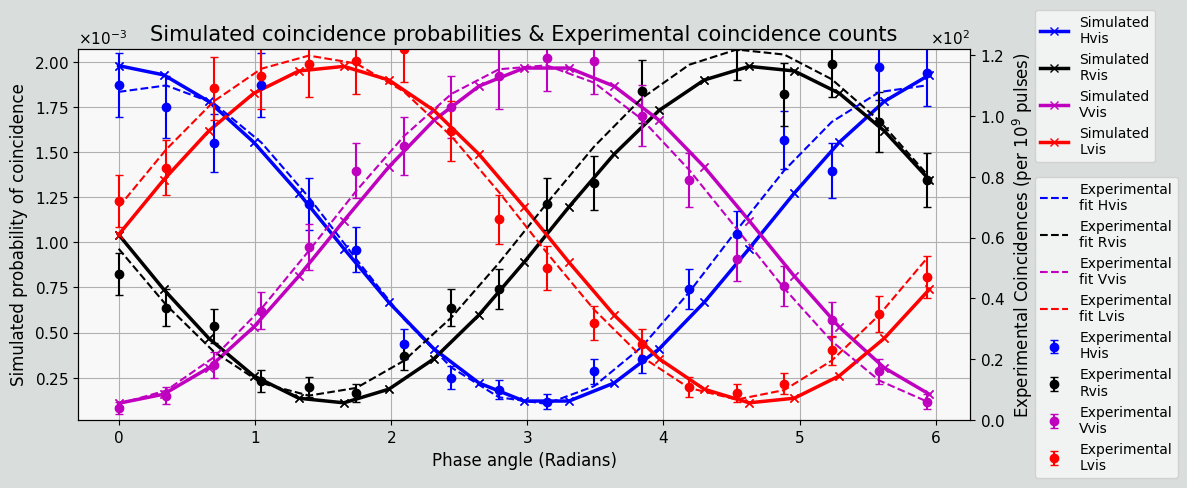

In [10]:
from scipy import optimize


signal_angles = np.linspace(0, 2*np.pi, 20)
idler_angles = [0, np.pi/2, np.pi, 3*np.pi/2]

data_file = open(data_root_path+'/distribution_data/distribution_data.json', 'r')
coincidences = json.load(data_file)['0']

min_diff_index = 0
avg_visibility = 0

for i in range(len(idler_angles)):
    visibility = (max(coincidences[min_diff_index][i]) - min(coincidences[min_diff_index][i]))/(max(coincidences[min_diff_index][i]) + min(coincidences[min_diff_index][i]))
    avg_visibility += visibility/len(idler_angles)
print("Average visibility:", avg_visibility)

def sinusoid(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Creating fitting curves
fringe_domain = np.array(signal_angles)
params0, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[min_diff_index][0], p0=(80,1,1,1))
params1, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[min_diff_index][1], p0=(80,1,1,1))
params2, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[min_diff_index][2], p0=(80,1,1,1))
params3, _ = optimize.curve_fit(sinusoid, fringe_domain, coincidences[min_diff_index][3], p0=(80,1,1,1))

exp_params0, _ = optimize.curve_fit(sinusoid, experimental_domain[:-1], H_data[:, 5][:-1], p0=(80,1,1,1))
exp_params1, _ = optimize.curve_fit(sinusoid, experimental_domain[:-1], L_data[:, 5][:-1], p0=(80,1,1,1))
exp_params2, _ = optimize.curve_fit(sinusoid, experimental_domain[:-1], V_data[:, 5][:-1], p0=(80,1,1,1))
exp_params3, _ = optimize.curve_fit(sinusoid, experimental_domain[:-1], R_data[:, 5][:-1], p0=(80,1,1,1))

# TNRfont = {'fontname':'serif'}

# Now, creating actual plots.

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(12,5))
# ax1.add_patch(rounded_rect)
fig.patch.set_facecolor("#d9dddc")
fig.patch.set_capstyle("round")
# plt.xticks(fontsize=12)
ax1.set_xlabel('Phase angle (Radians)', fontsize = 12)
ax1.set_ylabel('Simulated probability of coincidence', fontsize = 12)

# Plotting Simulation data
ax1.plot(fringe_domain[:-1], coincidences[min_diff_index][0][:-1], 'bx')
ax1.plot(fringe_domain[:-1], coincidences[min_diff_index][1][:-1], 'kx')
ax1.plot(fringe_domain[:-1], coincidences[min_diff_index][2][:-1], 'mx')
ax1.plot(fringe_domain[:-1], coincidences[min_diff_index][3][:-1], 'rx')

# Plotting sinusoidal fits
ax1.errorbar(fringe_domain[:-1], sinusoid(fringe_domain, *params0)[:-1], fmt = 'b-x', capsize=3, label = "Simulated\nHvis", linewidth = 2.5)
ax1.errorbar(fringe_domain[:-1], sinusoid(fringe_domain, *params1)[:-1], fmt = 'k-x', capsize=3, label = "Simulated\nRvis", linewidth = 2.5)
ax1.errorbar(fringe_domain[:-1], sinusoid(fringe_domain, *params2)[:-1], fmt = 'm-x', capsize=3, label = "Simulated\nVvis", linewidth = 2.5)
ax1.errorbar(fringe_domain[:-1], sinusoid(fringe_domain, *params3)[:-1], fmt = 'r-x', capsize=3, label = "Simulated\nLvis", linewidth = 2.5)

plt.legend(loc = 'upper left')

# # Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# plt.yticks(fontsize=12)
ax1.legend(loc='center left', bbox_to_anchor=(1.065, 0.9))


# Create second axis
ax2 = ax1.twinx()
ax2.set_ylim([0, max(max(H_data[:, 5][:-1]), max(V_data[:, 5][:-1]), max(L_data[:, 5][:-1]))])
ax2.set_ylabel(r'Experimental Coincidences (per $10^9$ pulses)', fontsize = 12)

# plotting experimental data
ax2.errorbar(experimental_domain[:-1], H_data[:, 5][:-1], yerr = np.sqrt(H_data[:, 5][:-1]), fmt = 'bo', capsize=3, label = "Experimental\nHvis")
ax2.errorbar(experimental_domain[:-1], R_data[:, 5][:-1], yerr = np.sqrt(R_data[:, 5][:-1]), fmt = 'ko', capsize=3, label = "Experimental\nRvis")
ax2.errorbar(experimental_domain[:-1], V_data[:, 5][:-1], yerr = np.sqrt(V_data[:, 5][:-1]), fmt = 'mo', capsize=3, label = "Experimental\nVvis")
ax2.errorbar(experimental_domain[:-1], L_data[:, 5][:-1], yerr = np.sqrt(L_data[:, 5][:-1]), fmt = 'ro', capsize=3, label = "Experimental\nLvis")

# Plotting experimental sinusoidal fits
ax2.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params0), 'b',  label = "Experimental\nfit Hvis", linestyle='dashed')
ax2.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params3), 'k',  label = "Experimental\nfit Rvis", linestyle='dashed')
ax2.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params2), 'm',  label = "Experimental\nfit Vvis", linestyle='dashed')
ax2.plot(experimental_domain[:-1], sinusoid(experimental_domain[:-1], *exp_params1), 'r',  label = "Experimental\nfit Lvis", linestyle='dashed')



# Put a legend to the right of the current axis
ax2.legend(loc='center left', bbox_to_anchor=(1.065, 0.25))

# plt.yticks(fontsize=12)
ax1.set_title("Simulated coincidence probabilities & Experimental coincidence counts", fontsize = 15)
ax2.grid()

plt.tight_layout()
fig.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/distribution_fringes.pdf", format = 'pdf')

## Distribution parameter estimation

det eff -21.678679937858224


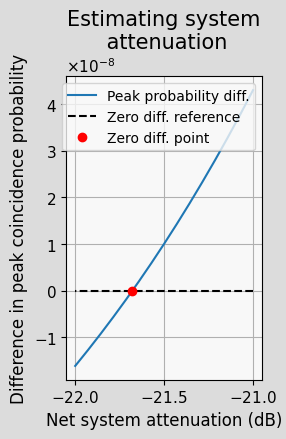

In [11]:
plt.facecolor = "#ddddd"

det_effs = np.linspace(-21, -22, 15)

data_file = open(data_root_path+'/distribution_data/attenuation_data.json', 'r')
peak_coincidence_probs = json.load(data_file)['peak_coinc_prob']

fig, ax1 = plt.subplots(figsize=(3,4.5))
# fig.patch.set_facecolor("#cfcda7")
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=12)
plt.plot(det_effs, peak_coincidence_probs, label = "Peak probability diff.")
plt.plot(det_effs, [0]*len(det_effs), color = "black", linestyle='dashed', label = "Zero diff. reference")

x = np.array(peak_coincidence_probs)
idx = np.argwhere(np.diff(np.sign(x))).flatten()[0]

# Linearly interpolating correct system attenuation 
interpolated_det_eff = det_effs[idx] - x[idx] * (det_effs[idx]-det_effs[idx+1])/(x[idx]-x[idx+1])
interpolated_diff = (x[idx]-x[idx+1])/(det_effs[idx]-det_effs[idx+1])*(interpolated_det_eff-det_effs[idx])+x[idx]

print("det eff", interpolated_det_eff)
plt.plot(interpolated_det_eff, interpolated_diff, 'ro', label = "Zero diff. point")
plt.title("Estimating system\n attenuation", fontsize = 15)
plt.xlabel("Net system attenuation (dB)", fontsize = 12)
ax1.set_ylabel("Difference in peak coincidence probability", fontsize = 12)
plt.legend()

plt.tight_layout()
fig.savefig("/home/asingal/home/SeQUeNCe/sequence_projects/TQE_final_plots/parameter_estimation.pdf", format = 'pdf')
